In [56]:
import transit_model as tm
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import pandas as pd 
sns.set_context('paper')

In [7]:
g, passengers = tm.initialize(n_passengers=100, node_capacity=1000)

In [8]:
10000/len(g.nodes)

71.42857142857143

since there are 140 nodes, we expect crowding effects to happen when `n_passengers/140 >=  node_capacity`

In [14]:
n_passengers = 10000
node_cap_range = [150, 125, 100, 75, 50, 25]

replicates = 3
max_steps = 1e3

print(n_passengers/len(g.nodes))

capacities = []
transit_times = []

for n in node_cap_range:
    print(f'running simulations for node_capacity = {n}')
    for r in range(replicates):
        g, passengers = tm.initialize(n_passengers=n_passengers,
                                      node_capacity=n)
        temp_transit_times = tm.update(g=g,
                                       passengers=passengers,
                                       max_run_steps=max_steps)
        if len(temp_transit_times) == n_passengers:
            transit_times.extend(temp_transit_times)
            capacities.extend([n]*len(temp_transit_times))
        else:
            print(f'simulation with capacity of {n} is has only {len(temp_transit_times)}/{n_passengers} completed')

71.42857142857143
running simulations for node_capacity = 150
running simulations for node_capacity = 125
running simulations for node_capacity = 100
running simulations for node_capacity = 75
running simulations for node_capacity = 50
running simulations for node_capacity = 25


In [16]:
capacity_dict = {'capacities':capacities, 'transit_times':transit_times}

data = pd.DataFrame.from_dict(capacity_dict)
data

,capacities,transit_times
0,150,1
1,150,1
2,150,1
3,150,1
4,150,1
...,...,...
179995,25,223
179996,25,232
179997,25,220
179998,25,231


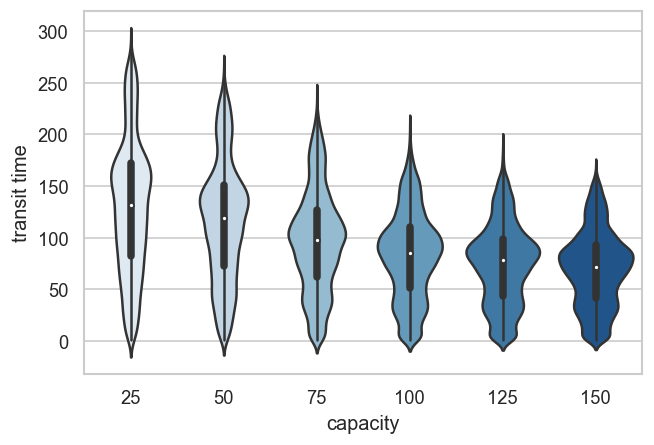

In [58]:
import seaborn as sns
import pandas as pd 
sns.set(style="whitegrid")
plt.figure(dpi=120)
sns.violinplot(x='capacities', y='transit_times', data=data, alpha=0.3, saturation=0.7, palette='Blues')
plt.xlabel('capacity')
plt.ylabel('transit time')
plt.show()

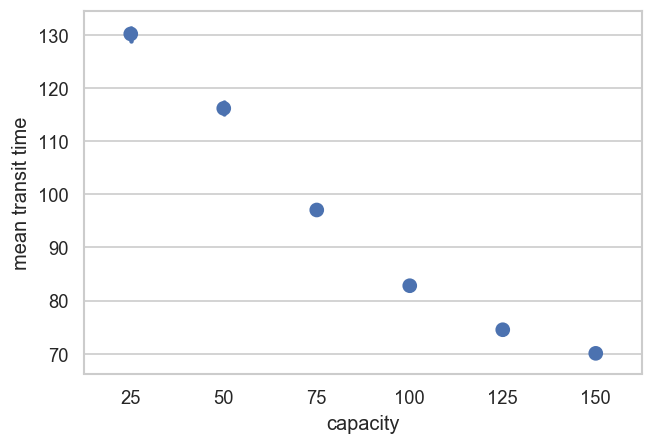

In [57]:
sns.set(style="whitegrid")
plt.figure(dpi=120)
sns.pointplot(x='capacities', y='transit_times', data=data, estimator=np.mean, alpha=0.3, saturation=0.7, ci=100, join=False)
plt.xlabel('capacity')
plt.ylabel('mean transit time')
plt.show()